In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pickle

In [3]:
df = pd.read_csv("data/airplane-accident-severity.csv")

In [4]:
df

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Significant_Damage_And_Serious_Injuries,56.118721,8,1,63.445761,0.482359,78.64,5,38537.363408,2,0.026150,11493
9996,Highly_Fatal_And_Damaging,40.365297,10,7,62.169553,0.421775,79.77,4,40846.916900,2,0.074898,305
9997,Significant_Damage_And_Serious_Injuries,27.853881,17,1,69.598906,0.318277,80.37,3,33771.996300,3,0.168173,612
9998,Minor_Damage_And_Injuries,56.210046,8,0,39.835916,0.598118,76.92,5,39820.419251,2,0.026381,4963


In [5]:
df.columns

Index(['Severity', 'Safety_Score', 'Days_Since_Inspection',
       'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation',
       'Violations', 'Adverse_Weather_Metric', 'Accident_ID'],
      dtype='object')

In [6]:
categorical = ['Violations','Accident_Type_Code']

In [7]:
df[categorical] = df[categorical].astype('object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Severity                 10000 non-null  object 
 1   Safety_Score             10000 non-null  float64
 2   Days_Since_Inspection    10000 non-null  int64  
 3   Total_Safety_Complaints  10000 non-null  int64  
 4   Control_Metric           10000 non-null  float64
 5   Turbulence_In_gforces    10000 non-null  float64
 6   Cabin_Temperature        10000 non-null  float64
 7   Accident_Type_Code       10000 non-null  object 
 8   Max_Elevation            10000 non-null  float64
 9   Violations               10000 non-null  object 
 10  Adverse_Weather_Metric   10000 non-null  float64
 11  Accident_ID              10000 non-null  int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 820.4+ KB


In [9]:
df.describe()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Max_Elevation,Adverse_Weather_Metric,Accident_ID
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,41.876406,12.931100,6.564300,65.145324,0.381495,79.969331,32001.803282,0.255635,6266.554200
std,16.138072,3.539803,6.971982,11.882934,0.121301,2.759739,9431.995196,0.381128,3610.170288
min,0.000000,1.000000,0.000000,0.000000,0.134000,74.740000,831.695553,0.000316,2.000000
25%,30.593607,11.000000,2.000000,56.927985,0.293665,77.960000,25757.636908,0.012063,3139.750000
50%,41.278539,13.000000,4.000000,65.587967,0.365879,79.540000,32060.336419,0.074467,6280.500000
75%,52.511416,15.000000,9.000000,73.336372,0.451346,81.560000,38380.641513,0.354059,9391.500000
max,100.000000,23.000000,54.000000,100.000000,0.882648,97.510000,64297.651218,2.365378,12500.000000


In [10]:
df[categorical].describe()

,Violations,Accident_Type_Code
count,10000,10000
unique,6,7
top,2,4
freq,3793,2057


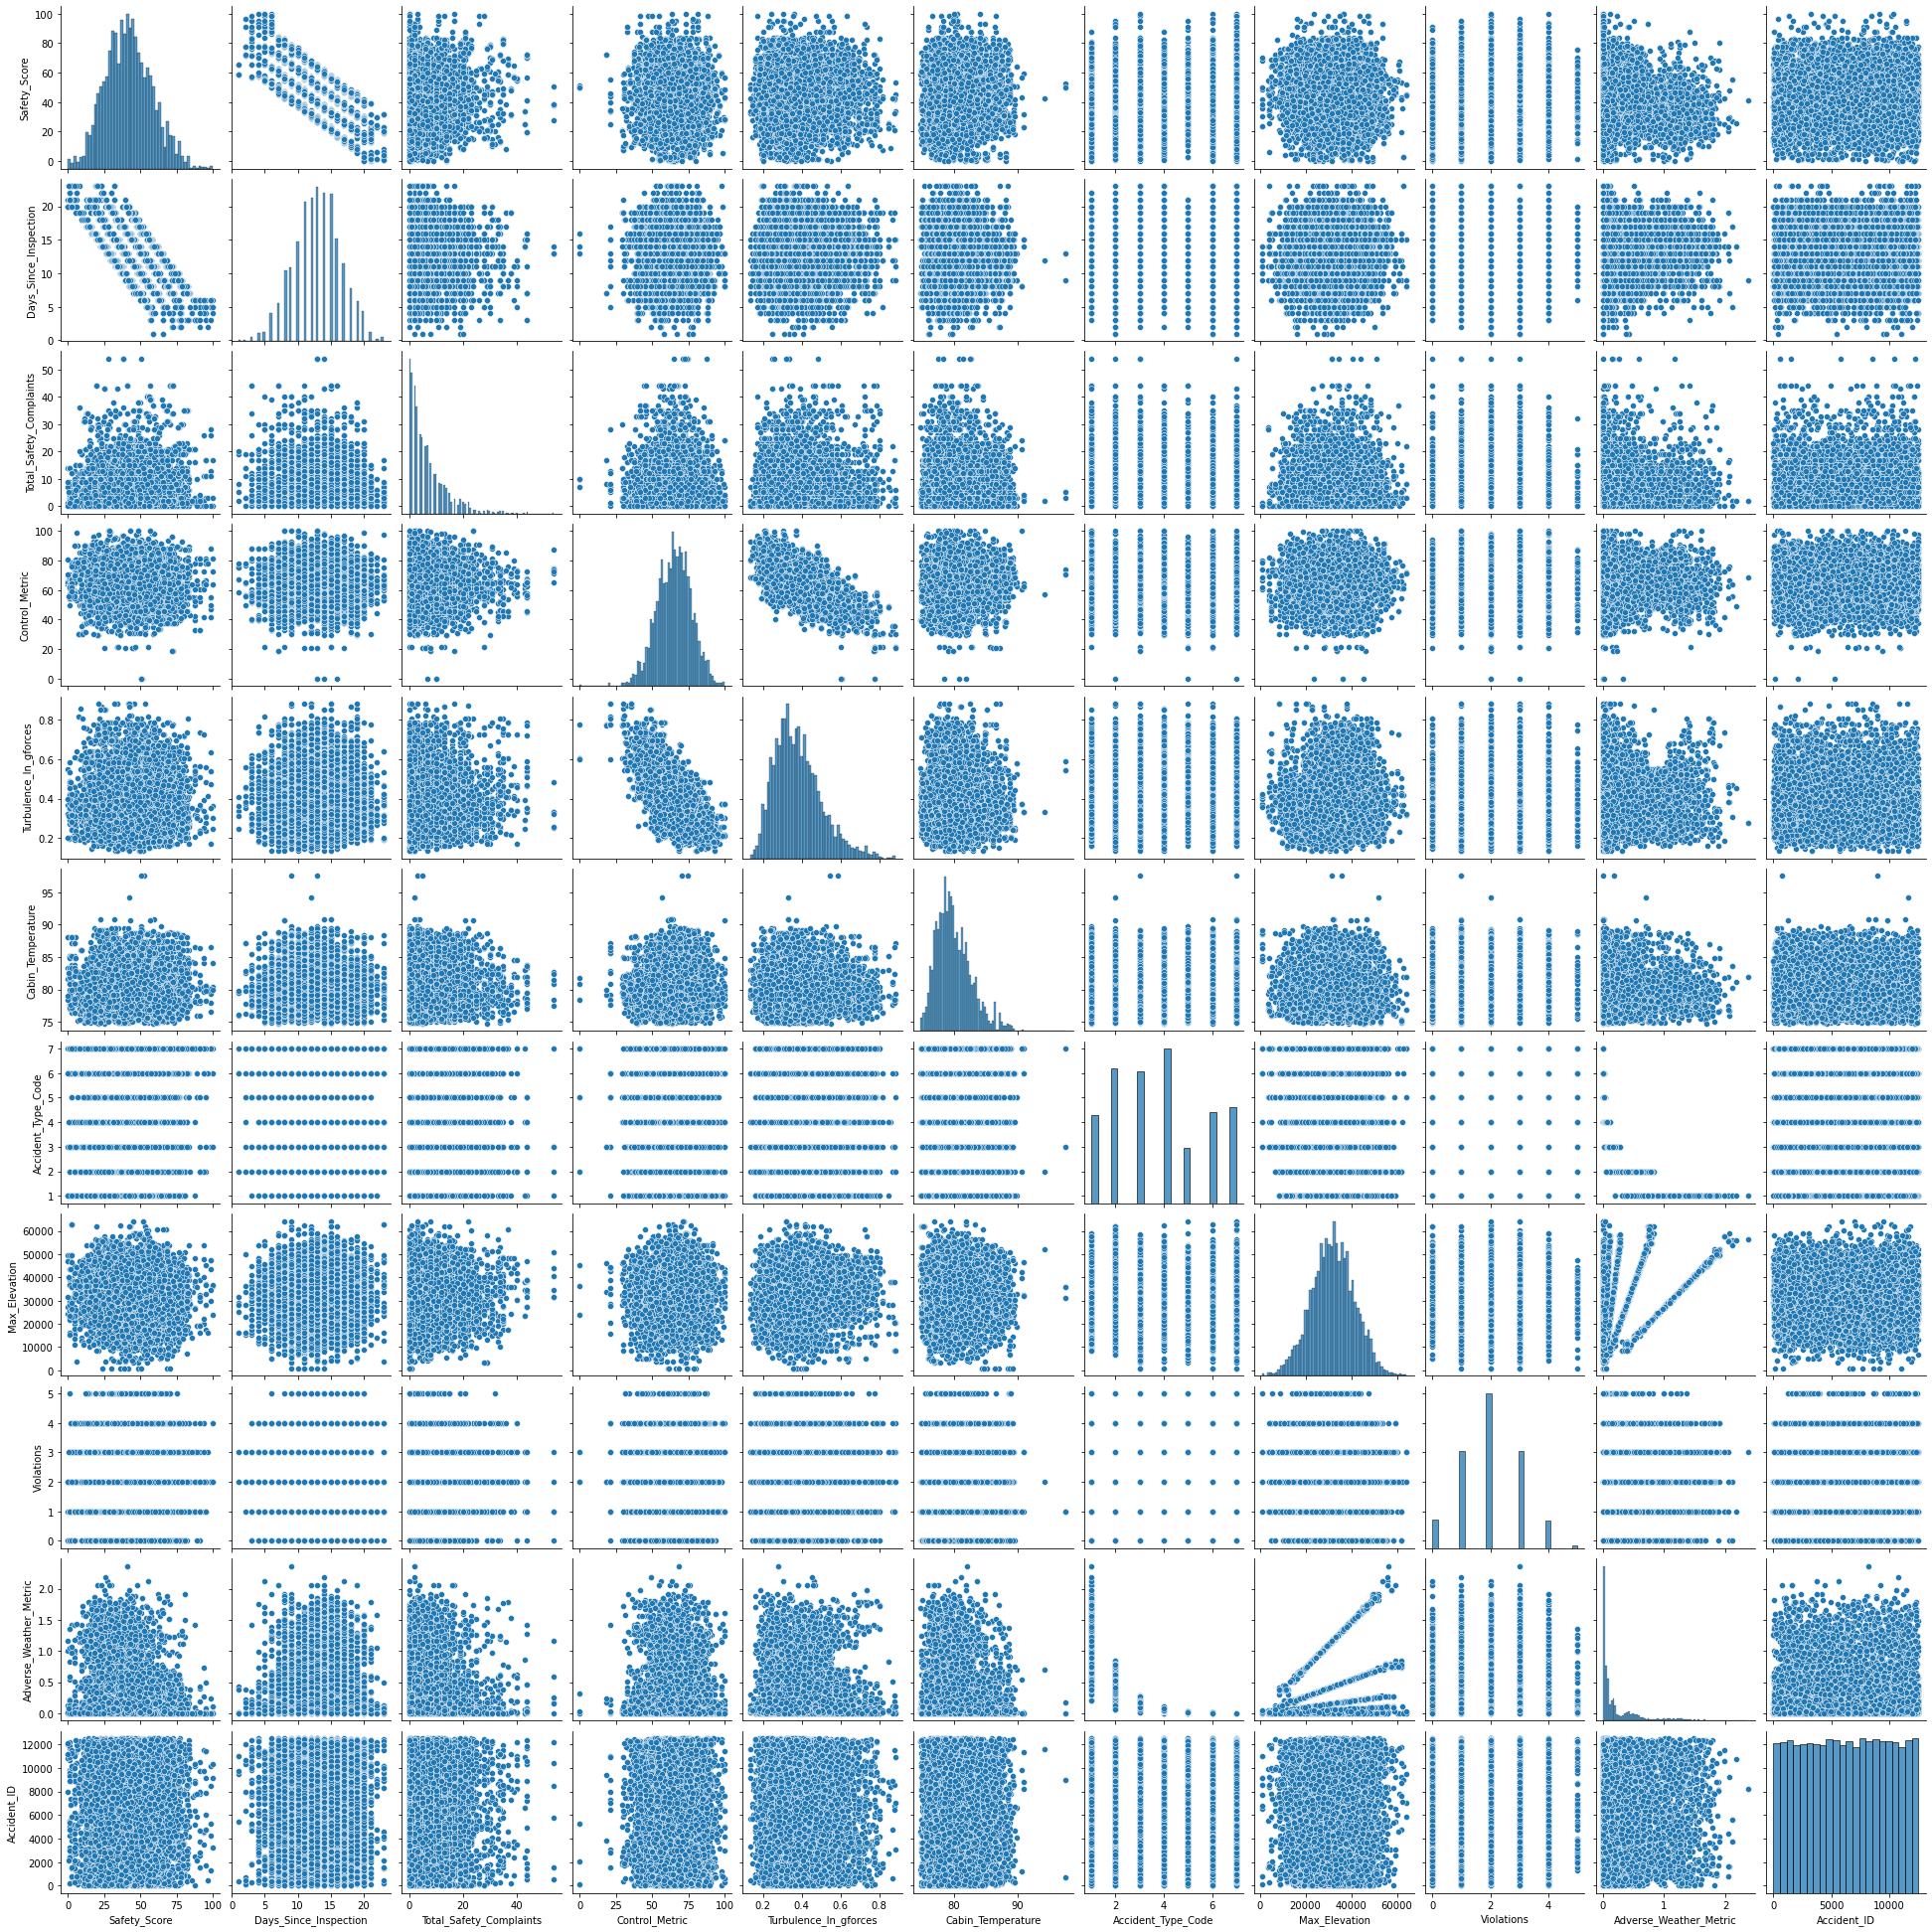

In [11]:
sns.pairplot(df)
plt.show()

In [12]:
X = df.drop(columns=["Severity", "Accident_ID"])
y = df["Severity"]

In [13]:
X = pd.get_dummies(X, columns=categorical)

In [18]:
label = LabelEncoder()
y = label.fit_transform(y)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=201)

In [20]:
classifier = GradientBoostingClassifier(n_estimators=100,
                                 max_depth=10,
                                 learning_rate=0.2, 
                                 random_state=101)

In [21]:
np.mean(cross_val_score(classifier, X_train, y_train))

0.9605

In [22]:
classifier.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=10, random_state=101)

In [23]:
y_pred = classifier.predict(X_test)

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       597
           1       0.95      0.97      0.96       531
           2       0.96      0.96      0.96       340
           3       0.96      0.95      0.96       532

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



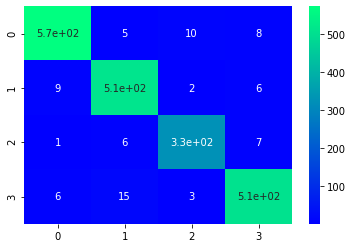

In [25]:
sns.heatmap(confusion_matrix(y_test, y_pred), cmap="winter", annot=True)
plt.show()

In [25]:
pickle.dump(classifier, open("gb_classifier.pkl", "wb"))